# Avatar questionnaire processing  

## Import packages 

In [90]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from statsmodels.stats.anova import *

## Function creation

1. extraRow: Creates a function that takes:
 - **df** = a data frame and checks if any of the elements of 
 - **yourlist** have a partial match with the content of the values of 
 - **variable** your variable of interest, if so it assigns the correspondedn matching value to 
 - **newvariable** the name of variable you want as an output 


In [91]:
def extraRow(df,yourlist,variable,newVariable):
    '''Creates a new variable that contains matching data from preexiting variable
    
Parameters
-------------
     
     df: your data frame,
     yourlist: List of values you want to target for the partial match search
     variable: Variable that may cointain the elements on yourlist
     newvariable: Name for  New Variable 
     
returns 
----------

    DataFrame
     '''
    for idx, row in df.iterrows():
        for l in yourlist:
            if l in row[variable]:
                df.loc[idx, newVariable] = l

## Preprocessing 

In [92]:
# Data set loading
df_file = '/Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/AvatarQuestionnaire/AvaQuest.csv'
df = pd.read_csv(df_file, sep= ',', header=None)
df.head()

,0,1,2,3
0,1,Remember_01_CmA,4,4597
1,1,Realistic_01_CmA,3,4597
2,1,Attractive_01_CmA,1,4597
3,2,Remember_29_Sa,1,4597
4,2,Realistic_29_Sa,2,4597


In [93]:
df = df.rename({0: 'order', 1: 'item', 2: 'likert', 3: 'ID'}, axis=1)
df.head()

,order,item,likert,ID
0,1,Remember_01_CmA,4,4597
1,1,Realistic_01_CmA,3,4597
2,1,Attractive_01_CmA,1,4597
3,2,Remember_29_Sa,1,4597
4,2,Realistic_29_Sa,2,4597


In [94]:
#Initial exploration of the data set 
df.item = df['item'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   order   3528 non-null   int64   
 1   item    3528 non-null   category
 2   likert  3528 non-null   int64   
 3   ID      3528 non-null   int64   
dtypes: category(1), int64(3)
memory usage: 95.1 KB


In [95]:
#Creating Clarity Categorical variable 
df['avatarCat'] = df['item'].str.contains('Sa')
df.loc[:, 'avatarCategory'] = df['avatarCat'].replace({True: 'Standing', False: 'Action'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   order           3528 non-null   int64   
 1   item            3528 non-null   category
 2   likert          3528 non-null   int64   
 3   ID              3528 non-null   int64   
 4   avatarCat       3528 non-null   bool    
 5   avatarCategory  3528 non-null   object  
dtypes: bool(1), category(1), int64(3), object(1)
memory usage: 126.1+ KB


In [96]:
df.head()

,order,item,likert,ID,avatarCat,avatarCategory
0,1,Remember_01_CmA,4,4597,False,Action
1,1,Realistic_01_CmA,3,4597,False,Action
2,1,Attractive_01_CmA,1,4597,False,Action
3,2,Remember_29_Sa,1,4597,True,Standing
4,2,Realistic_29_Sa,2,4597,True,Standing


In [97]:
#Checking that value counts for Action and Standing avatars corresponds with the number of participants
df.avatarCat.value_counts()

False    1764
True     1764
Name: avatarCat, dtype: int64

In [98]:
#List of values for iteration search 
itemCat = ['Remember','Realistic', 'Attractive']

#Searching for a partial string 'ItemCat' in variable 'Item' to creat a new variable 'ItemCat'
extraRow(df,itemCat,'item','itemCategory')
df.tail(5)

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory
3523,55,Realistic_06_CmA,5,4796,False,Action,Realistic
3524,55,Attractive_06_CmA,4,4796,False,Action,Attractive
3525,56,Remember_56_Sa,1,4796,True,Standing,Remember
3526,56,Realistic_56_Sa,4,4796,True,Standing,Realistic
3527,56,Attractive_56_Sa,3,4796,True,Standing,Attractive


In [99]:
#Extracting the Avatar number from the variable 'Item'
AvaIDs = []
for idx, row in df.iterrows():
    num = re.findall(r'\d+', row['item']) 
    AvaIDs.append(num)
    #Flatten the list: Every number was returned as a list of it's own with this we get one unified list
    avatarIDsf = [item for sublist in AvaIDs for item in sublist]


In [100]:
#Searching for a partial string contained in the lists "AvatarIDsf" in variable "Item" to creat a new variable "AvatarID"
extraRow(df,avatarIDsf,'item','avatarID')
df.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01
1,1,Realistic_01_CmA,3,4597,False,Action,Realistic,01
2,1,Attractive_01_CmA,1,4597,False,Action,Attractive,01
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29
4,2,Realistic_29_Sa,2,4597,True,Standing,Realistic,29


In [101]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
df.to_csv('CompleteLargeAvatarQues.cvs')

# Descriptives 

In [102]:
#Average values Support and clarity 
df.groupby([ 'ID', 'avatarCategory','itemCategory'])['likert'].mean()

ID    avatarCategory  itemCategory
365   Action          Attractive      2.214286
                      Realistic       3.392857
                      Remember        2.714286
      Standing        Attractive      1.178571
                      Realistic       1.964286
                                        ...   
9502  Action          Realistic       3.535714
                      Remember        3.214286
      Standing        Attractive      1.571429
                      Realistic       2.750000
                      Remember        1.285714
Name: likert, Length: 126, dtype: float64

In [103]:
#Average values Support and clarity 
df.groupby(['ID','avatarCategory','itemCategory'])['likert'].describe().sort_values(by='mean')

count      mean       std  min   25%  50%  \
ID   avatarCategory itemCategory                                              
3976 Standing       Remember       28.0  1.000000  0.000000  1.0  1.00  1.0   
     Action         Attractive     28.0  1.035714  0.188982  1.0  1.00  1.0   
     Standing       Attractive     28.0  1.035714  0.188982  1.0  1.00  1.0   
1754 Standing       Remember       28.0  1.035714  0.188982  1.0  1.00  1.0   
365  Standing       Remember       28.0  1.107143  0.566947  1.0  1.00  1.0   
...                                 ...       ...       ...  ...   ...  ...   
1754 Action         Realistic      28.0  3.821429  0.722832  2.0  4.00  4.0   
5741 Action         Remember       28.0  3.857143  0.931518  2.0  3.00  4.0   
4796 Action         Realistic      28.0  3.857143  1.007905  1.0  3.75  4.0   
6642 Action         Realistic      28.0  3.892857  0.831745  2.0  3.75  4.0   
3976 Action         Realistic      28.0  4.321429  0.722832  2.0  4.00  4.0   

                                   75%  max  
ID   avatarCategory itemCategory             
3976 Standing       Remember      1.00  1.0  
     Action         Attractive    1.00  2.0  
     Standing       Attractive    1.00  2.0  
1754 Standing       Remember      1.00  2.0  
365  Standing       Remember      1.00  4.0  
...                                ...  ...  
1754 Action         Realistic     4.00  5.0  
5741 Action         Remember      4.25  5.0  
4796 Action         Realistic     4.25  5.0  
6642 Action         Realistic     4.00  5.0  
3976 Action         Realistic     5.00  5.0  

[126 rows x 8 columns]

In [104]:
AvatarIDsL = df.pivot_table('likert',  'avatarID').sort_values(by='likert')
AvatarIDsL

,likert
avatarID,
33,1.476190
53,1.619048
31,1.666667
37,1.714286
45,1.761905
27,1.825397
39,1.857143
51,1.920635
32,1.920635


## Data Visualization

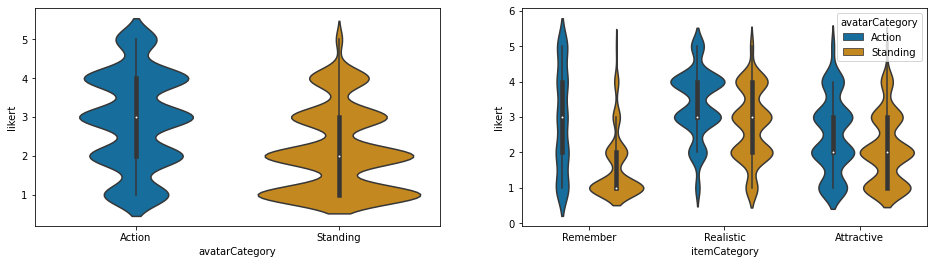

In [105]:
sns.set_palette('colorblind')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.violinplot(data= df, x='avatarCategory', y='likert', ax=axes[0])
sns.violinplot(data= df, x='itemCategory', y='likert', hue= 'avatarCategory',  ax=axes[1])
plt.show()

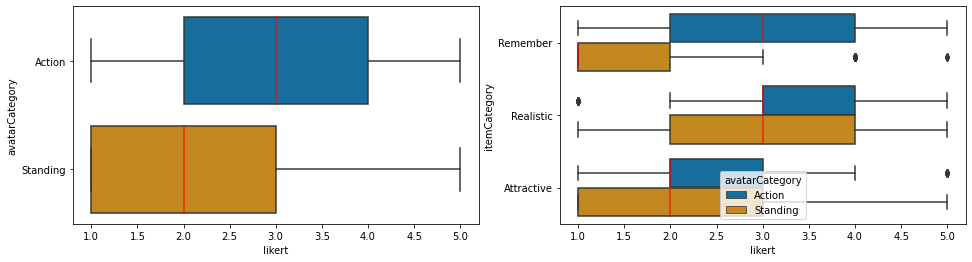

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.boxplot(data= df, y='avatarCategory', x='likert', orient="h",  medianprops=dict(color="red", alpha=0.7), ax=axes[0])
sns.boxplot(data= df, y='itemCategory', x='likert', hue= 'avatarCategory', orient="h",  medianprops=dict(color="red", alpha=0.7), ax=axes[1])
plt.show()

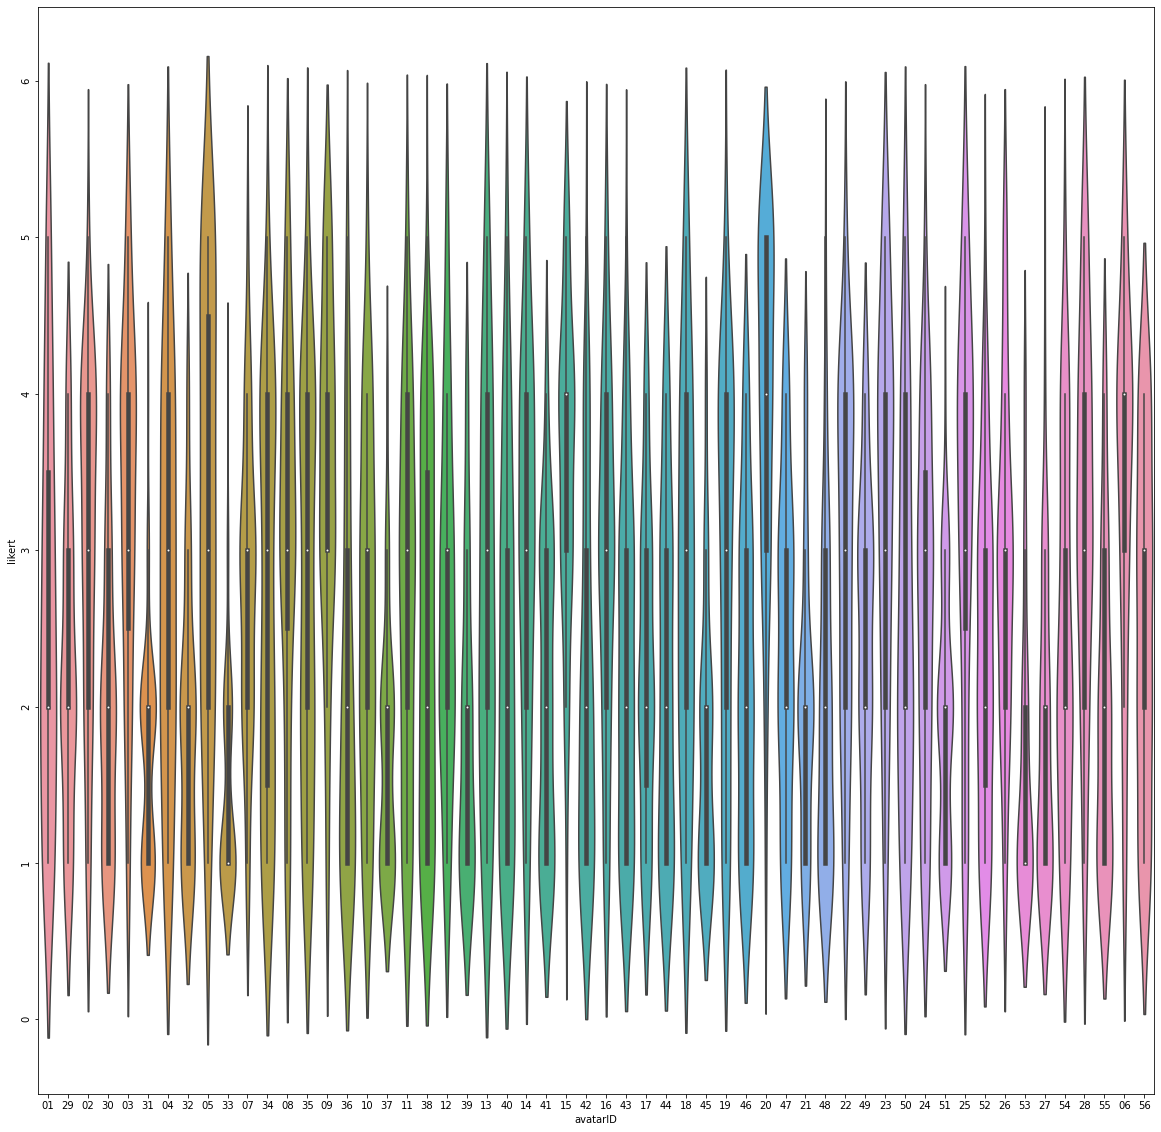

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
sns.violinplot(data= df, x='avatarID', y='likert', scale='width')
plt.yticks(rotation=90)
plt.show()

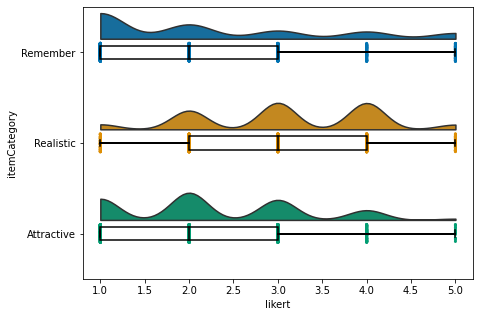

In [108]:
dy='itemCategory'; dx='likert'; ort='h'; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = 'area', width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = 'white',
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = 'black', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', 'zorder':10},\
            showfliers=True, whiskerprops = {'linewidth':2, 'zorder':10},\
               saturation = 1, orient = ort) 

## Data analysis

In [109]:
from statsmodels.stats.anova import AnovaRM
help(AnovaRM)

Help on class AnovaRM in module statsmodels.stats.anova:

class AnovaRM(builtins.object)
 |  AnovaRM(data, depvar, subject, within=None, between=None, aggregate_func=None)
 |  
 |  Repeated measures Anova using least squares regression
 |  
 |  The full model regression residual sum of squares is
 |  used to compare with the reduced model for calculating the
 |  within-subject effect sum of squares [1].
 |  
 |  Currently, only fully balanced within-subject designs are supported.
 |  Calculation of between-subject effects and corrections for violation of
 |  sphericity are not yet implemented.
 |  
 |  Parameters
 |  ----------
 |  data : DataFrame
 |  depvar : str
 |      The dependent variable in `data`
 |  subject : str
 |      Specify the subject id
 |  within : list[str]
 |      The within-subject factors
 |  between : list[str]
 |      The between-subject factors, this is not yet implemented
 |  aggregate_func : {None, 'mean', callable}
 |      If the data set contains more than 

In [110]:
df1 = df[df['itemCategory']== 'Remember']
df1.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29
6,3,Remember_02_CmA,4,4597,False,Action,Remember,02
9,4,Remember_30_Sa,1,4597,True,Standing,Remember,30
12,5,Remember_03_CmA,5,4597,False,Action,Remember,03


In [111]:
#Sum all likert punctuations for the question on how well they remember by participant and avatar category
Topivot = pd.DataFrame(df1.groupby([ 'ID', 'avatarCategory'])['likert'].sum())
#Reformat to a wide dataframe
AvatarSum = pd.DataFrame(Topivot.pivot_table(index='ID', columns='avatarCategory', values='likert'))
AvatarSum.reset_index(drop=True)

avatarCategory,Action,Standing
0,76,31
1,47,29
2,97,41
3,63,48
4,53,28
5,84,31
6,93,35
7,65,48
8,90,35
9,95,43


In [112]:
AvatarSum.rename(columns={
    AvatarSum.columns[0]: 'avatar_action_likert',
    AvatarSum.columns[1]: 'avatar_standing_likert'}, inplace=True)

In [113]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
AvatarSum.to_csv('AvatarSum.csv')

In [114]:
print(AnovaRM(data=df1, depvar='likert', subject='ID', within=['avatarCategory'], aggregate_func = 'median').fit())

                   Anova
               F Value Num DF  Den DF Pr > F
--------------------------------------------
avatarCategory 62.3176 1.0000 20.0000 0.0000



In [115]:
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

In [116]:
# Define model formula
formula = 'avatarCat ~ likert'

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = df1, family = family_GLM).fit()
print(model_LM.summary())

                            Generalized Linear Model Regression Results                            
Dep. Variable:     ['avatarCat[False]', 'avatarCat[True]']   No. Observations:                 1176
Model:                                                 GLM   Df Residuals:                     1174
Model Family:                                     Binomial   Df Model:                            1
Link Function:                                       logit   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -660.72
Date:                                     Fri, 13 May 2022   Deviance:                       1321.4
Time:                                             14:42:59   Pearson chi2:                 1.16e+03
No. Iterations:                                          4                                         
Covariance Type:                                 nonrobust                                         


In [117]:
# Define model formula
formula = 'likert ~ avatarCat '

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = df1, family = family_LM).fit()
print(model_LM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 likert   No. Observations:                 1176
Model:                            GLM   Df Residuals:                     1174
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          1.3899
Method:                          IRLS   Log-Likelihood:                -1861.2
Date:                Fri, 13 May 2022   Deviance:                       1631.7
Time:                        14:42:59   Pearson chi2:                 1.63e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8844      0.04

In [118]:
# Define model formula
formula = 'likert ~ avatarCat * itemCategory'

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = df, family = family_LM).fit()
print(model_LM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 likert   No. Observations:                 3528
Model:                            GLM   Df Residuals:                     3522
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          1.1198
Method:                          IRLS   Log-Likelihood:                -5202.6
Date:                Fri, 13 May 2022   Deviance:                       3944.0
Time:                        14:42:59   Pearson chi2:                 3.94e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------